AI 프로그래밍 기말고사 1번  
데이터셋 링크  
https://drive.google.com/drive/folders/1gVksn7jKwZ9qpIlWRIdD0lsO4FUeqCdK

In [1]:
#원격 연결
from google.colab import drive

drive.mount('/content/drive')
!pip install colab_ssh --upgrade

from colab_ssh import launch_ssh_cloudflared, init_git_cloudflared
launch_ssh_cloudflared(password="1599")

# 경로
#   "./drive/MyDrive/Colab Notebooks/data/"

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 패키지
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import text_to_word_sequence, Tokenizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow.keras.datasets.mnist as mnist

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences

import sys
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import os, glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [4]:
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/data/aip_final_q1.csv')

In [5]:
df.head()

,id,name,release_date,artists,total_tracks,t_name0,t_name1,t_name2,t_dur0,t_dur1,...,t_val0,t_val1,t_val2,t_tempo0,t_tempo1,t_tempo2,t_sig0,t_sig1,t_sig2,popularity
0,5954,III,2019-09-13,"The Lumineers,",13,Donna,Life In The City,Gloria,185973,231360.0,...,0.2820,0.273,0.659,134.121,97.005,78.211,4.0,3.0,4.0,60
1,74417,If No Be You,2020-08-25,"Jamopyper,",1,If No Be You,NaN,NaN,211849,NaN,...,0.6870,NaN,NaN,130.012,NaN,NaN,4.0,NaN,NaN,25
2,112996,FOS,2021-06-04,"MXY, Volt,",1,FOS,NaN,NaN,157040,NaN,...,0.0867,NaN,NaN,125.985,NaN,NaN,4.0,NaN,NaN,6
3,126251,Yeh Yeh,2019-10-31,"RICCI,",1,Yeh Yeh,NaN,NaN,222563,NaN,...,0.7510,NaN,NaN,130.058,NaN,NaN,4.0,NaN,NaN,28
4,109925,Trip At Knight (Complete Edition),2021-08-21,"Trippie Redd,",18,Molly Hearts,MP5 (feat. SoFaygo),Betrayal (feat. Drake),162960,160000.0,...,0.6580,0.567,0.129,80.977,150.017,158.114,4.0,3.0,4.0,80


In [6]:
df = pd.DataFrame({'total_tracks': df['total_tracks'] , 't_dur0' : df['t_dur0'], 't_energy0':df['t_energy0'], 't_speech0':df['t_speech0'],'t_acous0': df['t_acous0'], 't_tempo0':df['t_tempo0'], 'popularity':df['popularity']})
df.head()


,total_tracks,t_dur0,t_energy0,t_speech0,t_acous0,t_tempo0,popularity
0,13,185973,0.247,0.0350,0.9600,134.121,60
1,1,211849,0.865,0.0762,0.2490,130.012,25
2,1,157040,0.573,0.0644,0.2510,125.985,6
3,1,222563,0.923,0.1600,0.0337,130.058,28
4,18,162960,0.742,0.0408,0.0637,80.977,80


In [7]:
df.isna().sum().sort_values(ascending = False).head(15)

t_energy0       145
t_speech0       145
t_acous0        145
t_tempo0        145
total_tracks      0
t_dur0            0
popularity        0
dtype: int64

In [8]:
df = df.dropna(axis=0)
df.isna().sum().sort_values(ascending = False).head(15)

total_tracks    0
t_dur0          0
t_energy0       0
t_speech0       0
t_acous0        0
t_tempo0        0
popularity      0
dtype: int64

In [9]:
df.head()

,total_tracks,t_dur0,t_energy0,t_speech0,t_acous0,t_tempo0,popularity
0,13,185973,0.247,0.0350,0.9600,134.121,60
1,1,211849,0.865,0.0762,0.2490,130.012,25
2,1,157040,0.573,0.0644,0.2510,125.985,6
3,1,222563,0.923,0.1600,0.0337,130.058,28
4,18,162960,0.742,0.0408,0.0637,80.977,80


In [10]:
#데이터 정규화
scaler_ = MinMaxScaler()
scaler_.fit(df)
scaled_ = scaler_.transform(df)

data = pd.DataFrame(scaled_)

#inverse_minmaxscaler를 위함
scaler = MinMaxScaler()
scaler.fit(df['popularity'].values.reshape(-1,1))


print(data)
print(f"최소\n{data.min()}")
print(f"최대\n{data.max()}")

               0         1      2         3         4         5         6
0       0.010093  0.041226  0.247  0.036157  0.963855  0.567838  0.595960
1       0.000000  0.047044  0.865  0.078719  0.250000  0.550441  0.242424
2       0.000000  0.034719  0.573  0.066529  0.252008  0.533392  0.050505
3       0.000000  0.049454  0.923  0.165289  0.033835  0.550636  0.272727
4       0.014298  0.036051  0.742  0.042149  0.063956  0.342838  0.797980
...          ...       ...    ...       ...       ...       ...       ...
109850  0.010093  0.046746  0.383  0.033264  0.284137  0.736609  0.575758
109851  0.007569  0.054923  0.883  0.055682  0.119478  0.528967  0.373737
109852  0.000000  0.054270  0.794  0.226240  0.072289  0.448551  0.030303
109853  0.000000  0.040466  0.644  0.076860  0.660643  0.427437  0.727273
109854  0.000000  0.036531  0.448  0.293388  0.531124  0.664579  0.404040

[109855 rows x 7 columns]
최소
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64
최대
0

In [11]:
X = data.iloc[:, :6]
y = data.iloc[:, 6]


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True) #여기서 20% 나눠주고

In [13]:
X_train.value_counts()

0         1         2       3         4         5       
0.016821  0.075077  0.6670  0.336777  0.761044  0.367250    85
0.021867  0.011113  0.0474  0.543388  0.005181  0.436007    78
0.010093  0.028189  0.8480  0.136364  0.082329  0.508243    63
0.009251  0.043693  0.7930  0.410124  0.272088  0.303663    61
0.000000  0.047078  0.7040  0.063533  0.020382  0.635045    61
                                                            ..
          0.055984  0.6120  0.199380  0.237952  0.464601     1
                    0.6200  0.240702  0.228916  0.677336     1
          0.055986  0.9350  0.039256  0.053514  0.524996     1
          0.055997  0.7220  0.030579  0.095582  0.541982     1
0.003364  0.077886  0.7840  0.045558  0.608434  0.437810     1
Length: 44068, dtype: int64

In [14]:
#모델 만들기

model = Sequential()
model.add(Dense(14, input_dim = 6, activation = 'relu'))
model.add(Dense(42, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                98        
                                                                 
 dense_1 (Dense)             (None, 42)                630       
                                                                 
 dense_2 (Dense)             (None, 20)                860       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,609
Trainable params: 1,609
Non-trainable params: 0
_________________________________________________________________



Epoch 1: val_loss improved from inf to 0.05139, saving model to ./data/model/test1_best_model.hdf5

Epoch 2: val_loss improved from 0.05139 to 0.05120, saving model to ./data/model/test1_best_model.hdf5

Epoch 3: val_loss improved from 0.05120 to 0.05104, saving model to ./data/model/test1_best_model.hdf5

Epoch 4: val_loss improved from 0.05104 to 0.05078, saving model to ./data/model/test1_best_model.hdf5

Epoch 5: val_loss improved from 0.05078 to 0.05054, saving model to ./data/model/test1_best_model.hdf5

Epoch 6: val_loss improved from 0.05054 to 0.05026, saving model to ./data/model/test1_best_model.hdf5

Epoch 7: val_loss improved from 0.05026 to 0.04997, saving model to ./data/model/test1_best_model.hdf5

Epoch 8: val_loss improved from 0.04997 to 0.04964, saving model to ./data/model/test1_best_model.hdf5

Epoch 9: val_loss improved from 0.04964 to 0.04899, saving model to ./data/model/test1_best_model.hdf5

Epoch 10: val_loss improved from 0.04899 to 0.04846, saving model t

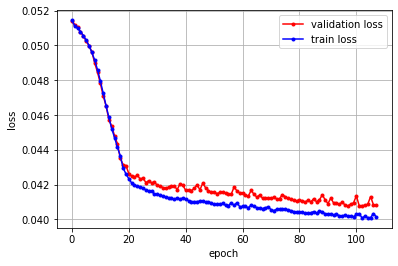

In [15]:
# 모델 학습

modelpath = './data/model/test1_best_model.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)


history = model.fit(X_train, y_train, validation_split = 0.25, epochs = 2000, batch_size = 2000, verbose = 0, callbacks = [early_stopping_callback, checkpointer])
print("\n Test accuracy: {}.".format(model.evaluate(X_test, y_test)[1]))

y_vloss = history.history['val_loss'] # validation loss
y_loss = history.history['loss'] # train loss

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'validation loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'train loss')
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

687/687 [==============================] - 1s 1ms/step


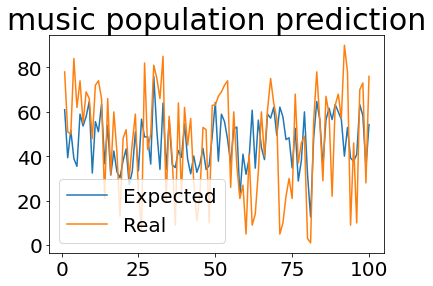

In [17]:
#결과 시각화 하기

real_prices_n = []
pred_prices_n = []
X_num = []
y_test_set = y_test.to_numpy() #인덱스가 뒤죽박죽이어서 인덱스도 바꾸고 데이타 타입도 바꿔줄 겸 쫙~~

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
#print(round(mean_squared_error(y_test,Y_prediction),3)) #왜 안돼죠??

for i in range(len(X_test)):
  real = y_test_set[i]
  prediction = Y_prediction[i]
 
  real_prices_n.append(real)
  pred_prices_n.append(prediction)
  n_iter = n_iter + 1
  X_num.append(n_iter)



real_pop = scaler.inverse_transform(pd.DataFrame(real_prices_n)) #노멀라이징 된 예측값을 원래 주가로 돌려주기 위함이다.
pred_pop = scaler.inverse_transform(pd.DataFrame(pred_prices_n))


figsize = (30,10)
plt.rc('font', size=20)  
plt.title('music population prediction', size = 30)
plt.plot(X_num[:100], pred_pop[:100], label = 'Expected')
plt.plot(X_num[:100], real_pop[:100], label = 'Real')
plt.legend()
plt.show() 

#우리집 3070으로 돌렸으면 잘 나올 걸요?? 경험담
